In [1]:
# General desciption of the notebook using simple comments
# 1. Import the data from MIPAR for a given precipitate
# 2. Apply the necessary correction factors for a thin sample [Sonderegger, B. (2006) Ultramicroscopy 106 941-950]
# 3. Calculate diameter, Nv, phase fraction and lambda

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
file = 'Feature measurements (MPH219_9).txt'
data = pd.read_csv(file, delimiter = "\t")
df = pd.DataFrame(data)

In [3]:
# specify the constant parameters
thickness = 0.1
area = 10*10

In [4]:
# calculate the correction factors for diameter (Method 4)
df['Corrected'] = 2*(1/np.pi)*(df["Equivalent Diameter (um)"] - thickness) \
    + np.sqrt((2*(1/np.pi)*df["Equivalent Diameter (um)"] - thickness)**2 \
    + 4*df["Equivalent Diameter (um)"]*thickness/np.pi)

# Weighted mean diameter (Method 4)
dmi = df["Equivalent Diameter (um)"]
d4i = df["Corrected"]
dm = np.sum(d4i*thickness/(d4i+thickness)) / np.sum(thickness/(d4i+thickness))

# Number density (Method 3)
Nv = np.sum((1/(thickness+d4i))) / area

# Phase fraction (Method 3)
Ai = df['Area (um^2)']
fv = (1/area)*np.sum(Ai*(2*dmi/thickness)/(2*dmi+3))

# Precipitate spacing (µm)
lam = np.sqrt(np.log(3)/(2*np.pi*Nv*dm/2) + 4*(dm/2)**2) - 1.63*dm/2

In [5]:
# descriptive stats
print(thickness)
print(area)
print(dm)
print(Nv)
print(fv)
print(lam)

0.1
100
0.1572086267913278
4.237804981884654
0.04282486852059354
0.613235446244


(array([ 0.        ,  0.61728395,  3.7037037 ,  6.17283951,  4.32098765,
         4.62962963,  4.32098765,  2.77777778,  2.16049383,  1.2345679 ,
         1.2345679 ,  0.61728395,  0.30864198,  0.61728395,  0.        ,
         0.30864198,  0.30864198,  0.        ,  0.        ,  0.        ]),
 array([ 0.  ,  0.03,  0.06,  0.09,  0.12,  0.15,  0.18,  0.21,  0.24,
         0.27,  0.3 ,  0.33,  0.36,  0.39,  0.42,  0.45,  0.48,  0.51,
         0.54,  0.57,  0.6 ]),
 <a list of 1 Patch objects>)

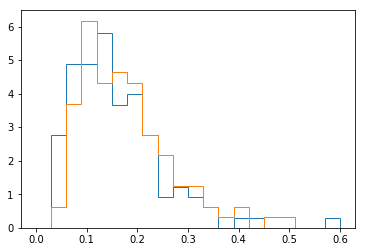

In [6]:
# plots
plt.hist(df["Equivalent Diameter (um)"], bins = 20, range = [0.0, 0.6], histtype = "step", density = True)
plt.hist(df["Corrected"], bins = 20, range = [0.0, 0.6], histtype = "step", density = True)

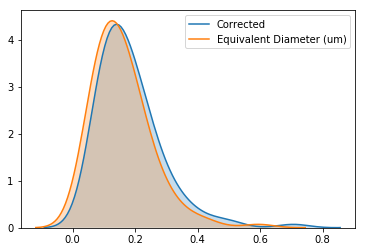

In [7]:
# calculate the values
sns.kdeplot(df["Corrected"], bw = 0.05, shade = True)
sns.kdeplot(df["Equivalent Diameter (um)"], bw = 0.05, shade = True)